In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('cmc_train.csv')

train_labels = df['label']
train_labels = np.array(train_labels)
print(train_labels)

train_features = df.iloc[:,:9]
train_features = np.array(train_features)
print(train_features)

print('train_features', train_features.shape)
print('train_labels', train_labels.shape)

df = pd.read_csv('cmc_test.csv')

test_labels = df['label']
test_labels = np.array(test_labels)
print(test_labels)

test_features = df.iloc[:,:9]
test_features = np.array(test_features)
print(test_features)

print('test_features', test_features.shape)
print('test_labels', test_labels.shape)

[1 1 1 ... 3 3 3]
[[24  2  3 ...  2  3  0]
 [45  1  3 ...  3  4  0]
 [43  2  3 ...  3  4  0]
 ...
 [39  3  3 ...  1  4  0]
 [33  3  3 ...  2  2  0]
 [17  3  3 ...  2  4  0]]
train_features (1327, 9)
train_labels (1327,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[[33  4  4 ...  3  3  0]
 [32  2  4 ...  3  3  0]
 [45  1  1 ...  2  2  1]
 ...
 [37  4  4 ...  3  4  0]
 [27  2  2 ...  3  1  0]
 [28  4  4 ...  1  3  0]]
test_features (146, 9)
test_labels (146,)


In [7]:
#获取准确率最高的rel_knn_algorithm、rel_weight和rel_nearest_neighbor
from sklearn import neighbors,decomposition
rel_nearest_neighbor = 0
rel_knn_algorithm = ''
rel_weight = ''
knn_algorithms = ['ball_tree', 'kd_tree', 'brute']
weights = ['uniform', 'distance']
rel_pre = -1

for knn_algorithm in knn_algorithms:
    #nearest_neighbor参数范围为1-147
    for nearest_neighbor in range(1,int(1473 * 0.1)):
        for weight in weights:
            clf = neighbors.KNeighborsClassifier(n_neighbors = nearest_neighbor, weights=weight, algorithm=knn_algorithm)
            clf = clf.fit(train_features, train_labels)

            pre = clf.predict(test_features)
            accuracy = np.sum(pre == test_labels) / pre.shape[0]
            #print('knn_algorithm =',knn_algorithm,',nearest_neighbors =', nearest_neighbor,',weight =',weight,  ',accuracy=', accuracy)
            if accuracy >= rel_pre:
                rel_pre = accuracy
                rel_knn_algorithm =knn_algorithm
                rel_weight = weight
                rel_nearest_neighbor = nearest_neighbor

print('rel_knn_algorithm：',rel_knn_algorithm)
print('rel_weight：',rel_weight)
print('rel_nearest_neighbor：',rel_nearest_neighbor)

rel_knn_algorithm： kd_tree
rel_weight： uniform
rel_nearest_neighbor： 40


**********************Result**********************
Training time cost 0.0019979476928710938 s
Test time cost 0.0059816837310791016 s
knn_algorithm = kd_tree ,nearest_neighbors = 40 ,weight = uniform ,accuracy= 0.5958904109589042


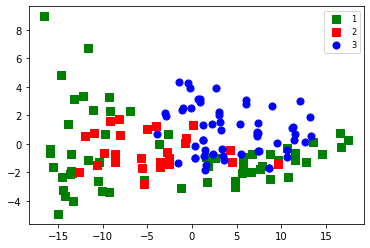

In [10]:
import matplotlib.pyplot as plt
import time
def plotBestFit(data0,data1, data2):

    a = np.shape(data0)[0]
    b = np.shape(data1)[0]
    c = np.shape(data2)[0]

    
    axis_x0 = []
    axis_y0 = []    
    axis_x1 = []
    axis_y1 = []
    axis_x2 = []
    axis_y2 = []

    
    for aa in range(a):
        axis_x0.append(data0[aa,0])
        axis_y0.append(data0[aa,1])
    for bb in range(b):
        axis_x1.append(data1[bb,0])
        axis_y1.append(data1[bb,1])
    for cc in range(c):
        axis_x2.append(data2[cc,0])
        axis_y2.append(data2[cc,1])
     
        
    fig = plt.figure()
    #ax = Axes3D(fig)
    ax = fig.add_subplot(111)
    ax.scatter(axis_x0, axis_y0, s=50, c='green', marker='s')
    ax.scatter(axis_x1, axis_y1, s=50, c='red', marker='s')
    ax.scatter(axis_x2, axis_y2,s=50, c='blue')


    
    #plt.xlabel('x1'); plt.ylabel('x2');
    # ax.set_zlabel('Z', fontdict={'size': 15, 'color': 'red'})
    # ax.set_ylabel('Y', fontdict={'size': 15, 'color': 'red'})
    # ax.set_xlabel('X', fontdict={'size': 15, 'color': 'red'})
    # ax.scatter(axis_x1, axis_y1,axis_z1,  c='red', marker='s')
    # ax.scatter(axis_x2, axis_y2, axis_z2, c='blue')
    plt.legend(fontsize='small',labels=[ '1','2','3'])  
    plt.savefig("knn-matplotlib.png")
    plt.show()
    
print('**********************Result**********************')
time_start = time.time()

#创建一个K临近算法的模板
clf = neighbors.KNeighborsClassifier(n_neighbors = rel_nearest_neighbor, weights=rel_weight,
                                     algorithm=rel_knn_algorithm)

#fit函数 使用train_features作为训练数据，train_labels作为目标值（类似于标签）来拟合模型。
clf = clf.fit(train_features, train_labels)
time_end = time.time()
print('Training time cost',time_end-time_start,'s')
time_start = time.time()

#调用predict函数进行预测
label_predict = clf.predict(test_features)
time_end = time.time()
print('Test time cost',time_end-time_start,'s')
accuracy = np.sum(label_predict == test_labels) / label_predict.shape[0]
#print(label_predict)
print('knn_algorithm =',rel_knn_algorithm,',nearest_neighbors =', rel_nearest_neighbor,',weight =',rel_weight,  ',accuracy=', accuracy)

pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(test_features.astype(np.float64))

plotBestFit(X_pca[label_predict == 1],X_pca[label_predict == 2],X_pca[label_predict == 3])

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score
"""预测结果"""
print("Predict_rlt:",label_predict)
"""预测准确个数"""
print("Correct_no:",sum(label_predict==test_labels))
"""预测准确率"""
print("Accuracy:",sum(label_predict==test_labels)/len(test_labels))

#以下代码用交叉验证的方法计算KNN在该数据集分类预测中的准确性
knn = KNeighborsClassifier(n_neighbors=1)
score_knn_accuracy = np.mean(cross_val_score(estimator=knn, X=train_features, y=train_labels, cv=5, scoring='accuracy'))
print("Score_accuracy:",score_knn_accuracy)

F1_score = f1_score( test_labels, label_predict, average='micro' )
precision = precision_score(test_labels, label_predict, average='micro')
recall = recall_score(test_labels, label_predict, average='micro')

print("F1_score：",F1_score)
print("precision：",precision)
print("recall：",recall)

Predict_rlt: [2 1 1 1 1 1 3 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 3 3 3 2 1 3 1 1 2
 1 3 3 3 1 1 1 3 1 3 1 1 2 3 1 1 1 1 1 1 1 1 3 3 3 2 2 2 1 1 1 1 3 3 1 2 3
 2 2 2 1 3 3 3 2 3 1 2 2 1 3 2 1 3 2 2 3 3 3 1 2 3 3 1 3 3 3 1 3 3 3 3 2 3
 1 2 1 1 3 3 3 3 3 2 2 3 3 1 2 3 3 3 2 3 2 1 3 3 3 3 3 3 3 3 3 1 2 3 1]
Correct_no: 87
Accuracy: 0.5958904109589042
Score_accuracy: 0.4649794297063413
F1_score： 0.5958904109589042
precision： 0.5958904109589042
recall： 0.5958904109589042


In [3]:
#获取准确率最高的rel_knn_algorithm、rel_weight和rel_nearest_neighbor
from sklearn import neighbors,decomposition
rel_nearest_neighbor = 0
rel_knn_algorithm = ''
rel_weight = ''
knn_algorithms = ['ball_tree', 'kd_tree', 'brute']
weights = ['uniform', 'distance']
rel_pre = -1
x = []
y = []
#nearest_neighbor参数范围为1-200
for nearest_neighbor in range(1,int(1473* 0.1)):
    clf = neighbors.KNeighborsClassifier(n_neighbors = nearest_neighbor, weights='uniform', algorithm='kd_tree')
    clf = clf.fit(train_features, train_labels)

    pre = clf.predict(test_features)
    accuracy = np.sum(pre == test_labels) / pre.shape[0]
    x.append(nearest_neighbor)
    y.append(accuracy)
    #print('knn_algorithm =',knn_algorithm,',nearest_neighbors =', nearest_neighbor,',weight =',weight,  ',accuracy=', accuracy)
    if accuracy >= rel_pre:
        rel_pre = accuracy
        rel_nearest_neighbor = nearest_neighbor

print('rel_nearest_neighbor：',rel_nearest_neighbor)

rel_nearest_neighbor： 40


In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from pylab import *                                 #支持中文
mpl.rcParams['font.sans-serif'] = ['SimHei']
from matplotlib.pyplot import MultipleLocator
#从pyplot导入MultipleLocator类，这个类用于设置刻度间隔

#X轴，Y轴数据
# x = [0,1,2,3,4,5,6]
# y = [0.3,0.4,2,5,3,4.5,4]
plt.figure(figsize=(15,6)) #创建绘图对象
plt.plot(x,y,"b",linewidth=2,label="weights='uniform'\nalgorithm='kd_tree'")   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
# plt.xticks(x, x)
plt.yticks(size=18)
plt.xlabel("nearest_neighbor",size=18) #X轴标签
plt.ylabel("acc",size=18)  #Y轴标签
plt.title("knn-cmc-nearest_neighbor参数-准确率变化图",size=18) #图标题
plt.legend()  # 让图例生效
# # 设置数字标签
# for a, b in zip(x, y):
#     plt.text(a, b, b, ha='center', va='bottom')
x_major_locator=MultipleLocator(5)
#把x轴的刻度间隔设置为1，并存在变量里
ax=plt.gca()
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(-0.5,147)
#把x轴的刻度范围设置为-0.5到11，因为0.5不满一个刻度间隔，所以数字不会显示出来，但是能看到一点空白

plt.savefig("knn-cmc-nearest_neighbor参数选择图.png") #保存图
plt.show()  #显示图

NameError: name 'x' is not defined